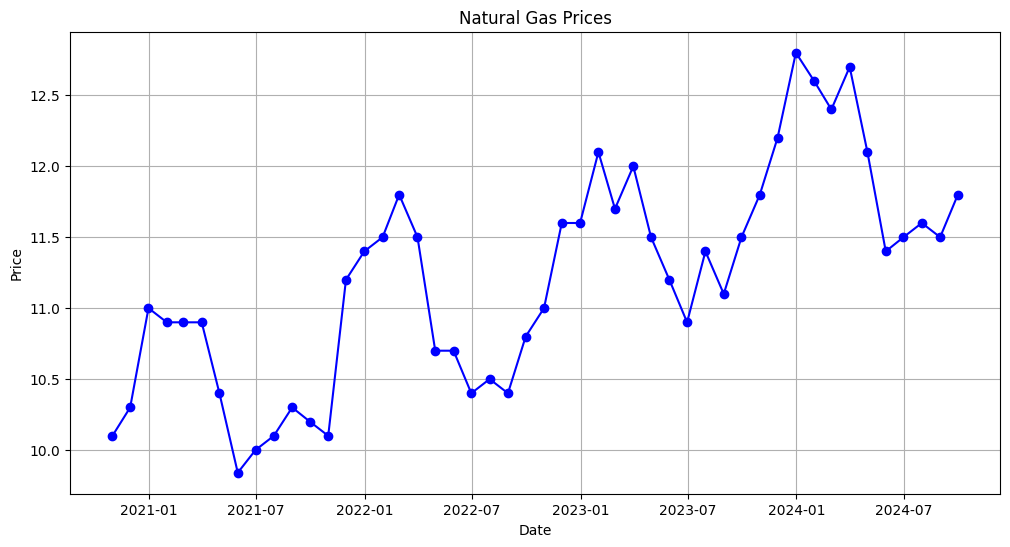

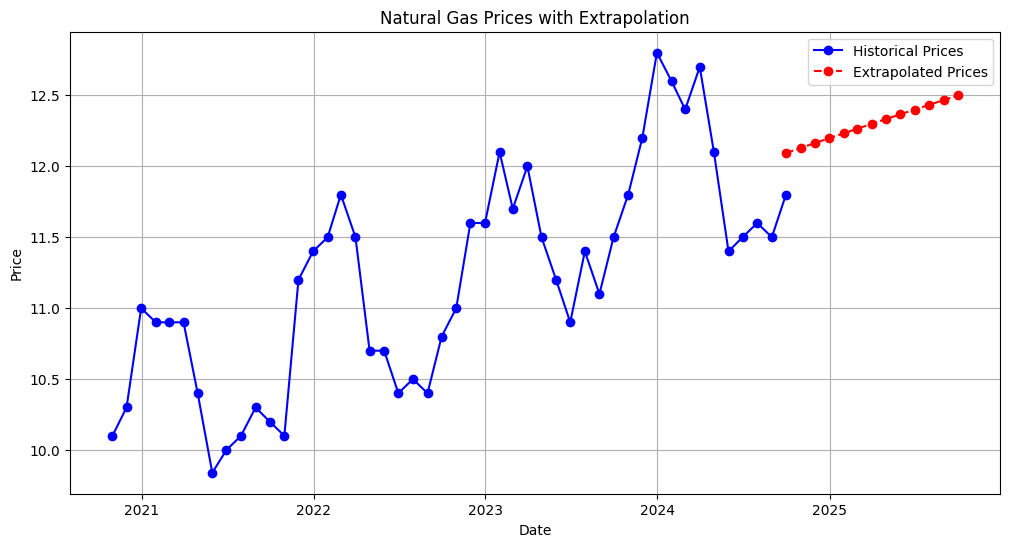

The estimated price of natural gas on 2025-01-15 is $12.21


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the data
data = pd.read_csv('Nat_Gas.csv')

# Convert Dates column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')

# Ensure data is sorted by date
data = data.sort_values('Dates')

# Extract the date and price information
dates = data['Dates'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)  # Convert dates to ordinal
prices = data['Prices'].values

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], prices, marker='o', linestyle='-', color='b')
plt.title('Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Fit a polynomial regression model for extrapolation
poly = PolynomialFeatures(degree=3)
dates_poly = poly.fit_transform(dates)

model = LinearRegression()
model.fit(dates_poly, prices)

# Function to estimate the price on a given date
def estimate_price(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d').toordinal()
    date_poly = poly.transform([[date]])
    price = model.predict(date_poly)
    return price[0]

# Extrapolate for the next year
future_dates = pd.date_range(start=data['Dates'].max(), periods=13, freq='M')
future_dates_ordinal = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
future_dates_poly = poly.transform(future_dates_ordinal)
future_prices = model.predict(future_dates_poly)

# Combine historical and extrapolated data for visualization
all_dates = np.concatenate((dates, future_dates_ordinal))
all_prices = np.concatenate((prices, future_prices))

# Visualize the historical data and the extrapolated future prices
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], prices, marker='o', linestyle='-', color='b', label='Historical Prices')
plt.plot(future_dates, future_prices, marker='o', linestyle='--', color='r', label='Extrapolated Prices')
plt.title('Natural Gas Prices with Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Example usage of the function
input_date = '2025-01-15'
estimated_price = estimate_price(input_date)
print(f"The estimated price of natural gas on {input_date} is ${estimated_price:.2f}")
